# Exploratory Data Analysis
#### By: Prajwal Brijesh Ainapur

In this repo, I cover all the basic data understanding as well as EDA on the Telemarketing Dataset obtained from UCI.

Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [2]:
import pycaret
import pandas as pd
import numpy as np
from pycaret import classification
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/prajwal_brijesh_ainapur/upgradSubmissions/MS_PGM/bank-additional/bank-additional-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


As per the dataset description, the duration column is added only after the call is made with the customer and thus, this information is not available well in advance. Thus we proceed to remove this column in order to create a realistic prediction model.

In [5]:
df = df.drop(columns = ['duration'], axis = 1)
df.shape

(41188, 20)

### Analyzing the dataset

#### Test for Null Values

In [6]:
#Testing the presence of any null values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As shown in the above results, there are no null values in any column

#### Datatype of the variable

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [8]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
dfTmp = df[['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
dfTmp.describe()

,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,93.575664,-40.502600,3.621291,5167.035911
std,0.578840,4.628198,1.734447,72.251528
min,92.201000,-50.800000,0.634000,4963.600000
25%,93.075000,-42.700000,1.344000,5099.100000
50%,93.749000,-41.800000,4.857000,5191.000000
75%,93.994000,-36.400000,4.961000,5228.100000
max,94.767000,-26.900000,5.045000,5228.100000




#### Unique values in each column

In [10]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64



#### Test for Duplicate values

In [11]:
print(df.shape)
df1 = df.drop_duplicates()
print(df1.shape)

(41188, 20)
(39404, 20)


As shown in the above values, there are about 12 duplicate datapoints in the dataset and as the number of duplicates are negligible compared to the total dataset, we proceed to remove those datapoints

#### Understanding outliers

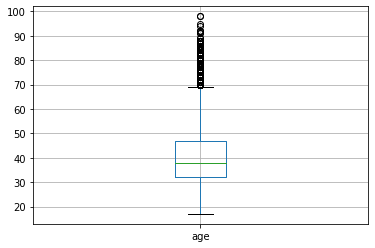

In [12]:
df1.boxplot(column = ['age'])
plt.show()

Though there are outliers in the age column, the values are legitimate values i.e. 90 years of age is practical. This only highlights that the customer details with the bank is highly concentrated on the working class i.e. 30-50 years of age. We proceed to not modify any values here as they are valuable nevertheless. 

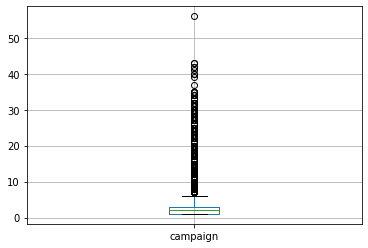

In [13]:
df1.boxplot(column = ['campaign'])
plt.show()

As per the dataset description, these values indicated the number of times the customer was contacted. We need not remove them as they could also potentially be useful. e.g. A customer might not be reachable and thus multiple contacts could have been made or else, A customer might have asked for additional information and thus the marketing person could have called back to follow up on the status.

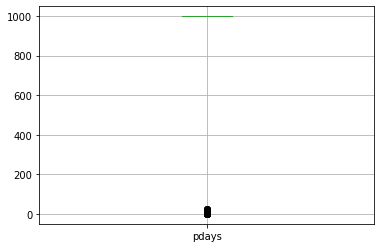

In [14]:
df1.boxplot(column = ['pdays'])
plt.show()

In [15]:
df1.pdays.value_counts()

999    37890
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

The pdays column is bit tricky to understand. Most of the values are 999 because as per the dataset, 999 means the customer was never contacted before.It can also be noticed in the number of times each value has occured. Almost 96% of customers were never contacted before. Thus we cannot treat this a direct numeric column and has to be converted into a categorical one.

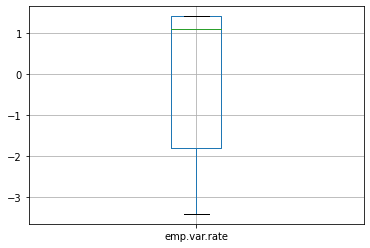

In [16]:
df1.boxplot(column = ['emp.var.rate'])
plt.show()

The emp.var.rate column does not have any significant outliers.

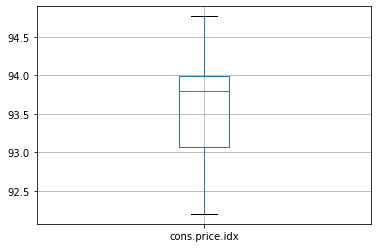

In [17]:
df1.boxplot(column = ['cons.price.idx'])
plt.show()

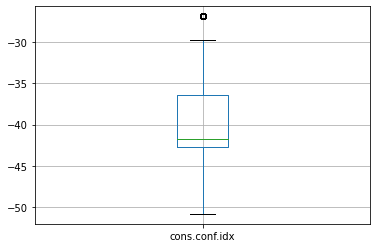

In [18]:
df1.boxplot(column = ['cons.conf.idx'])
plt.show()

Both the above columns are derived values i.e. index measure for price and confidence of the consumer. Thus there are no significant outliers and thus need not be treated

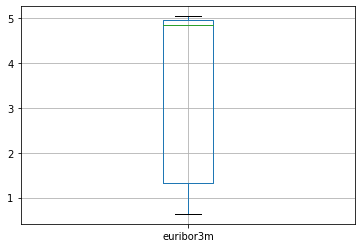

In [19]:
df1.boxplot(column = ['euribor3m'])
plt.show()

The euribor3m column indicates the trailing 3 month leding rate by the banks in european union

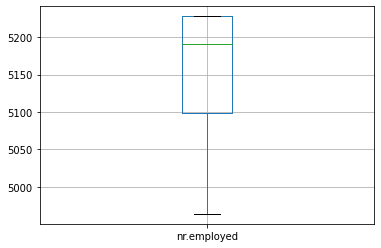

In [20]:
df1.boxplot(column = ['nr.employed'])
plt.show()

As shown in all the above box plots, there are no singificant outliers in most of the numeric columns and the ones which have are due to diversification of their customers and not a data entry mismatch. Thus no outlier treatment is required.

### Univariate Analysis

no     88.331134
yes    11.668866
Name: y, dtype: float64


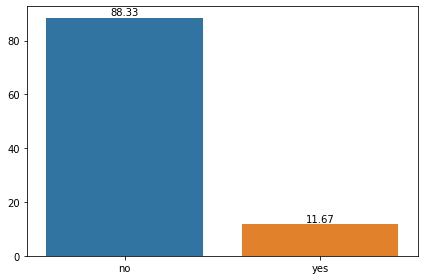

In [21]:
counts = df1['y'].value_counts() / df1.shape[0] * 100
print(counts)
# counts.plot(kind = 'bar')
# total = df1.shape[0]
total = 1
ax = sns.barplot(counts.index, counts.values)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.tight_layout()
# plt.legend()
plt.show()

As shown in the above plot, the dataset suffers significantly class imbalance. The 'no' class is almost 8x times appearing in the dataset over the 'yes' class

In [22]:
cols = set(df.columns)
num_cols = set(df1._get_numeric_data().columns)

cat_cols = list(cols - num_cols)
cat_cols

['marital',
 'default',
 'loan',
 'education',
 'job',
 'contact',
 'day_of_week',
 'y',
 'month',
 'housing',
 'poutcome']

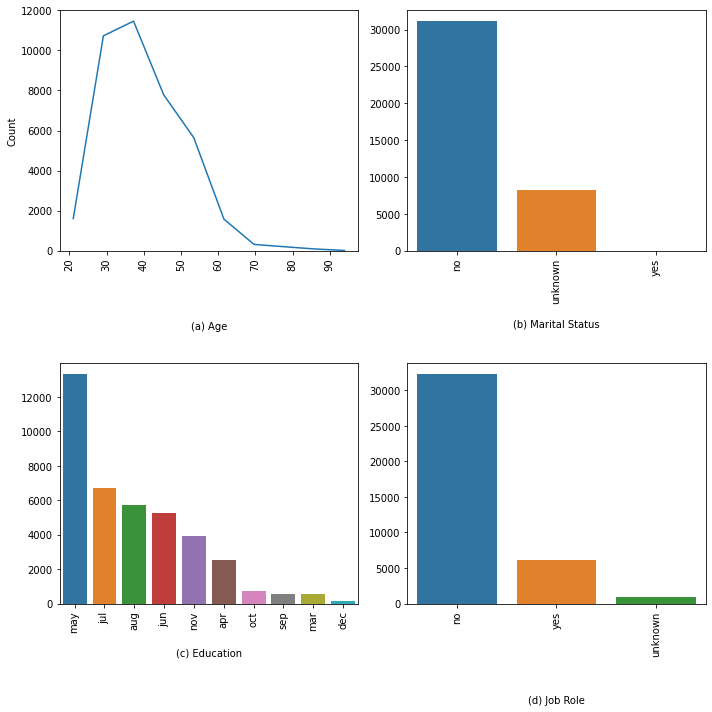

In [23]:
# for col in cat_cols:
#     sns.barplot(df1[col].value_counts().values, df1[col].value_counts().index)
#     plt.title(col) 
#     plt.xlabel('Count')
#     plt.show()

plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.xlabel('\n\n\n\n(a) Age')
plt.xticks(rotation=90)
sns.histplot(data = df1, x = 'age', bins = 10, element="poly", fill = False)
plt.subplot(2, 2, 4)
plt.xlabel('\n\n\n(d) Job Role')
plt.xticks(rotation=90)
sns.barplot(df1[cat_cols[2]].value_counts().index, df1[cat_cols[2]].value_counts().values)
plt.subplot(2, 2, 3)
plt.xlabel('\n(c) Education')
plt.xticks(rotation=90)
sns.barplot(df1[cat_cols[8]].value_counts().index, df1[cat_cols[8]].value_counts().values)
plt.subplot(2, 2, 2)
plt.xlabel('\n(b) Marital Status\n\n')
plt.xticks(rotation=90)
sns.barplot(df1[cat_cols[1]].value_counts().index, df1[cat_cols[1]].value_counts().values)
plt.tight_layout()
plt.show()

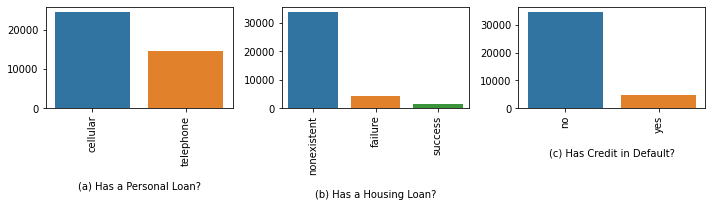

In [24]:
plt.figure(figsize = (10,3))
plt.subplot(1, 3, 1)
plt.xlabel('\n(a) Has a Personal Loan?')
plt.xticks(rotation=90)
sns.barplot(df1[cat_cols[5]].value_counts().index, df1[cat_cols[5]].value_counts().values)
plt.subplot(1, 3, 3)
plt.xlabel('\n(c) Has Credit in Default?')
plt.xticks(rotation=90)
sns.barplot(df1[cat_cols[7]].value_counts().index, df1[cat_cols[7]].value_counts().values)
plt.subplot(1, 3, 2)
plt.xlabel('\n(b) Has a Housing Loan?')
plt.xticks(rotation=90)
sns.barplot(df1[cat_cols[-1]].value_counts().index, df1[cat_cols[-1]].value_counts().values)
plt.tight_layout()
plt.show()

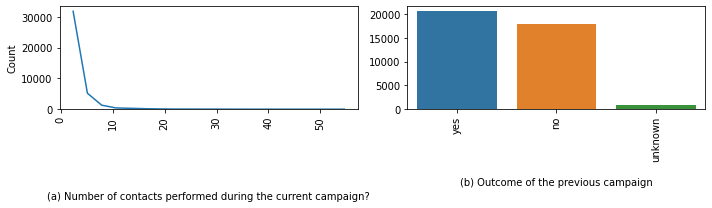

In [25]:
plt.figure(figsize = (10,3))
plt.subplot(1, 2, 1)
plt.xlabel('\n\n\n\n\n(a) Number of contacts performed during the current campaign?')
plt.xticks(rotation=90)
sns.histplot(data = df1, x = 'campaign', bins = 20, element="poly", fill = False)
plt.subplot(1, 2, 2)
plt.xlabel('\n(b) Outcome of the previous campaign')
plt.xticks(rotation=90)
sns.barplot(df1[cat_cols[-2]].value_counts().index, df1[cat_cols[-2]].value_counts().values)
plt.tight_layout()
plt.show()

The following observation can be gathered from the above graphs.

1. Majority of the client list haven't been contacted previously.
2. Contact has been made on almost all week days of a week uniformly
3. Majority of client base are married
4. Majority of client base haven't taken loan or defaulted previously.
5. Admin is the highest occurence for a job role among client base
6. Most of the client base has university degree as the highest level of education.

In [26]:
df_yes = df1[df1['y'] == 'yes']
df_no = df1[df1['y'] == 'no']

### Bivariate Analysis

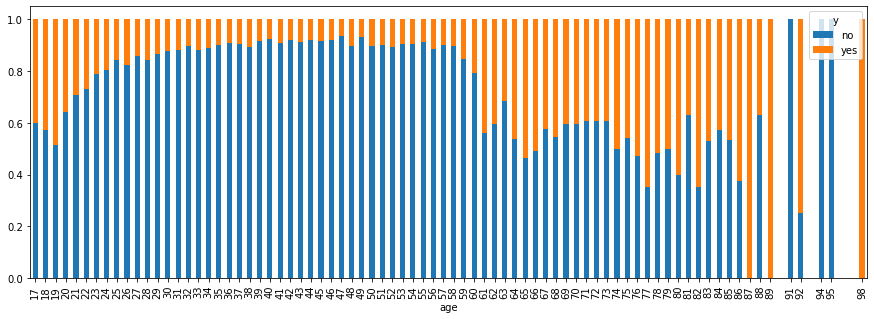

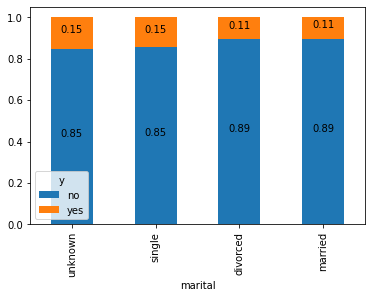

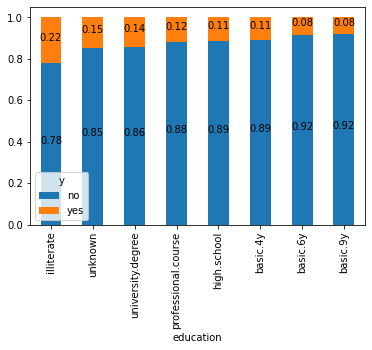

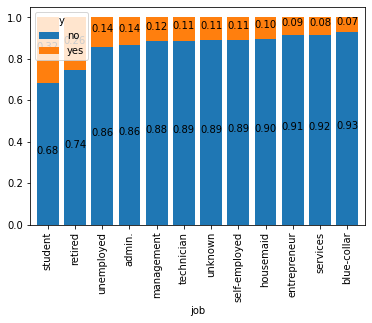

In [50]:
tt1 = pd.crosstab(df1.education, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
# print(tt1)
tt2 = pd.crosstab(df1.marital, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
# print(tt2)
tt3 = pd.crosstab(df1.age, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
# print(tt3)
tt4 = pd.crosstab(df1.job, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
# print(tt4)

# plt.figure(figsize = (10,10))
ax1 = tt3.plot.bar(stacked = True,figsize = (15,5))
plt.show()

ax2 = tt2.plot.bar(stacked = True)
for p in ax2.patches:
    
    ax2.text(p.get_x()+p.get_width()/2.,
            p.get_y()+p.get_height()/2.,
            '{:1.2f}'.format(p.get_height()/total),
            ha="center")
plt.show()
ax3 = tt1.plot.bar(stacked = True)
for p in ax3.patches:
    
    ax3.text(p.get_x()+p.get_width()/2.,
            p.get_y()+p.get_height()/2.,
            '{:1.2f}'.format(p.get_height()/total),
            ha="center") 
plt.show()
ax4 = tt4.plot.bar(stacked = 1, width = 0.8)
for p in ax4.patches:
    
    ax4.text(p.get_x()+p.get_width()/2.,
            p.get_y()+p.get_height()/2.,
            '{:1.2f}'.format(p.get_height()/total),
            ha="center") 
plt.show()

# for p in ax1.patches:
    
#     ax1.text(p.get_x()+p.get_width()/2.,
#             p.get_y()+p.get_height()/2.,
#             '{:1.2f}'.format(p.get_height()/total),
#             ha="center") 


 





Based on the above cross tab values, the clients with basic education are less likely to subscribe for the deposit.

y               no       yes
marital                     
unknown   0.848101  0.151899
single    0.854688  0.145312
divorced  0.894147  0.105853
married   0.894591  0.105409


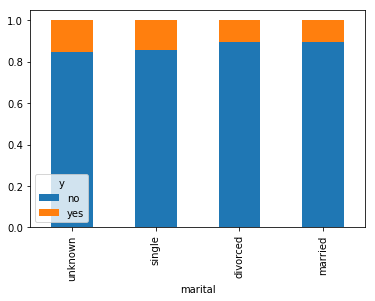

In [88]:
tt1 = pd.crosstab(df1.marital, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

The married or divorced clients are less likely to subscribe to the deposit. This could be because of the increased financial dependents.

y                    no       yes
job                              
student        0.681925  0.318075
retired        0.743910  0.256090
unemployed     0.857863  0.142137
admin.         0.864783  0.135217
management     0.884397  0.115603
technician     0.886477  0.113523
unknown        0.889231  0.110769
self-employed  0.892496  0.107504
housemaid      0.896887  0.103113
entrepreneur   0.913879  0.086121
services       0.915285  0.084715
blue-collar    0.928353  0.071647


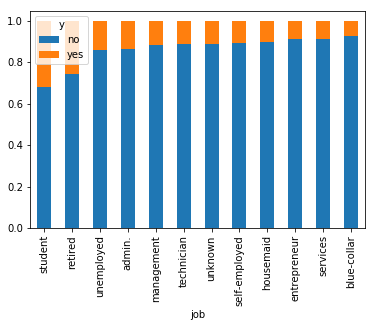

In [89]:
tt1 = pd.crosstab(df1.job, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In the above plot, there is a significant difference. The clients who are students or retired are more likely to subscribe. This could be attributed to the fact that the clients from these two categories are less likely to have financial dependents and thus would plan to save considerably.

y                  no       yes
poutcome                       
success      0.348397  0.651603
failure      0.855534  0.144466
nonexistent  0.908412  0.091588


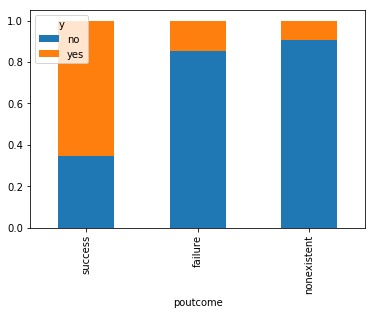

In [90]:
tt1 = pd.crosstab(df1.poutcome, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

The above chart shows that clients with whom previous campaigns were successful have a higher chances of subscribing again.

y                no       yes
contact                      
cellular   0.845540  0.154460
telephone  0.946575  0.053425


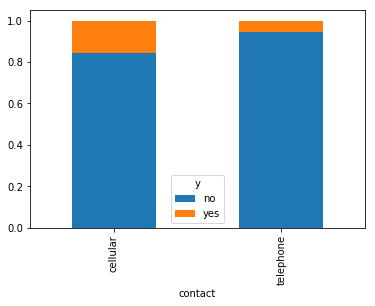

In [91]:
tt1 = pd.crosstab(df1.contact, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

Clients talking via cellular media are more likely to subscribe and the ratio becomes almost 3x in comparison to the ones via telephone. Possible reasoning for the observation is, clients with cellular mobiles obviously spend more on communication than telephone users and thus have higher purchasing power. 

y              no       yes
default                    
no       0.866517  0.133483
unknown  0.946528  0.053472
yes      1.000000  0.000000


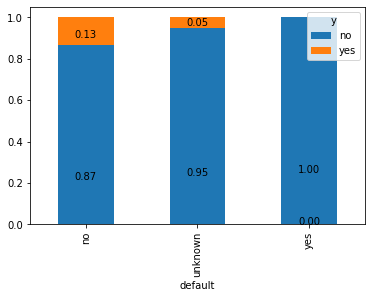

In [53]:
tt1 = pd.crosstab(df1.default, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
for p in ax.patches:
    
    ax.text(p.get_x()+p.get_width()/2.,
            p.get_y()+p.get_height()/4.,
            '{:1.2f}'.format(p.get_height()/total),
            ha="center") 
# plt.show()

plt.show()

#### The clients who have defaulted their loans have almost no chances of subscribing to deposits. The reasoning for the same is, Clients are low on funds to pay their loans on the first note and thus would be reluctant to take up deposits for saving their funds

y              no       yes
loan                       
no       0.881884  0.118116
yes      0.889573  0.110427
unknown  0.890816  0.109184


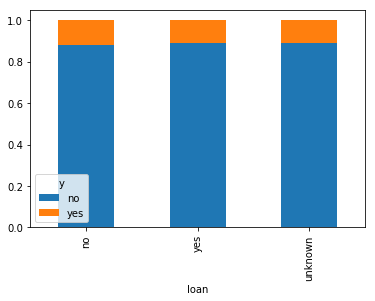

y              no       yes
housing                    
yes      0.879432  0.120568
no       0.887365  0.112635
unknown  0.890816  0.109184


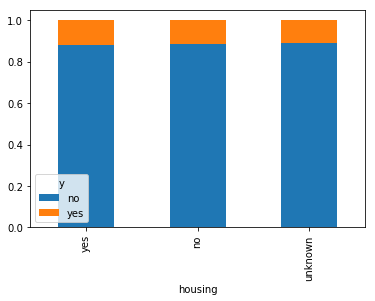

In [93]:
tt1 = pd.crosstab(df1.loan, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

tt1 = pd.crosstab(df1.housing, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In the above two plots, it is evident that effect of a client having a housing loan or personal loan is almost negligible upon deposit subscription.

y                  no       yes
day_of_week                    
thu          0.873490  0.126510
tue          0.877400  0.122600
wed          0.879639  0.120361
fri          0.888756  0.111244
mon          0.897167  0.102833


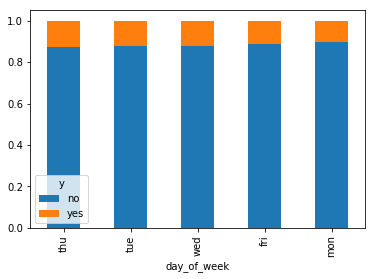

In [94]:
tt1 = pd.crosstab(df1.day_of_week, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'yes', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

Though the number of client calls over the days of the week is almost uniform, there is a clear pattern of deviation over the success ratio of the calls. The calls made during mid-week i.e. Tue-Thur have almost 30-50% higher chances of having the client subscribe to the deposit. The possible reasoning could be, clients are busy catching up with work on the first weekday and also busy planning for weekend on last weekday